# Instal and Import



**Import dan install semua package yang dibutuhkan**

In [ ]:
import pandas as pd
#pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

!pip install twint
import twint
import nest_asyncio
nest_asyncio.apply()


#import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install PySastrawi
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import wordcloud

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from keras.models import Sequential
#from keras.layers import Embedding, Dense, Dropout, LSTM
#from keras.optimizers import Adam, RMSprop, SGD
#from keras.callbacks import EarlyStopping
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 6.4 MB/s 
     |████████████████████████████████| 263 kB 47.3 MB/s 
     |████████████████████████████████| 382 kB 42.9 MB/s 
     |████████████████████████████████| 291 kB 39.8 MB/s 
     |████████████████████████████████| 94 kB 3.7 MB/s 
     |████████████████████████████████| 144 kB 33.1 MB/s 
     |████████████████████████████████| 271 kB 43.9 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 59 kB 6.0 MB/s 
     |████████████████████████████████| 139 kB 32.4 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33929 sha256=ad22af5267b26e139dfb6647c07f50136e5af1322a9d45c26d8ef7533b753e7e
  Stored in directory: /root/.cache/pip/wheels/44/fc/77/99887a36b5c265a87516158858697d1a0b8f32c4d4dbddbb24
  Created wheel 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#install tweet-preprocessor to clean tweets
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preprocessing

**Input Data**

In [ ]:
df = pd.read_csv('/content/EcommerceReviewlabeled.csv', encoding='latin-1')
df['content']=df['content'].apply(str)

#id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None)
#id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

**Pembersihan data**

In [ ]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [ ]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_text(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

#alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
#def normalize_alay(text):
#    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

In [ ]:
def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 2
    #text = remove_stopword(text)
    text = stemming(text) # 4
    return text

In [ ]:
df['text_clean'] = clean_text(df["content"])

In [ ]:
df['text_clean'] = df['text_clean'].apply(preprocess)

In [ ]:
K = df['content']
B  = df['text_clean']

In [ ]:
df.head()

,userName,at,content,score,label_inset,text_clean
0,Andy Setiawan,6/19/2022 6:27,Memuas kan,5,1,muas kan
1,Ghina Qurrata,6/19/2022 6:27,Dateng nya lama,4,1,dateng nya lama
2,Wahyuni Astuti,6/19/2022 6:27,Memudahkan untuk belanja tanpa keringat ð,5,1,mudah untuk belanja tanpa keringat
3,inu fiati,6/19/2022 6:26,Good,5,1,good
4,andre siung,6/19/2022 6:26,"Aplikasi nya sdh bagus,tp setelah pembaruan te...",3,-1,aplikasi nya sdh bagustp telah baru terakhr u ...


In [ ]:
df['label_inset'].value_counts()

-1    1860
 1    1140
Name: label_inset, dtype: int64

In [ ]:
#df['class'].value_counts()

In [ ]:
#df['label_scorebased'].value_counts()

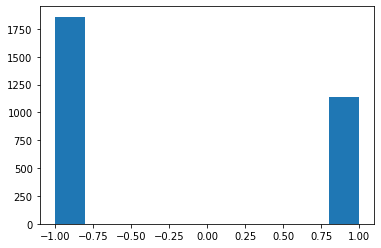

In [ ]:
plt.hist(df['label_inset'])
plt.show()

In [ ]:
data_negatif  = df[df['label_inset'] == -1].copy()
data_positif = df[df['label_inset'] == 1].copy()

In [ ]:
def show_wordcloud(data_positif_or_negatif, title):
    text = ' '.join(data_positif_or_negatif['text_clean'].astype(str).tolist())
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=['saya','lagi','nya','tapi','dan','ada',"yg","yang","kalo","ini"] ,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

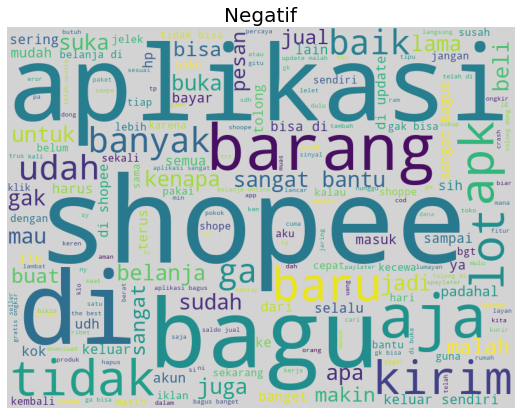

In [ ]:
show_wordcloud(data_negatif, "Negatif")

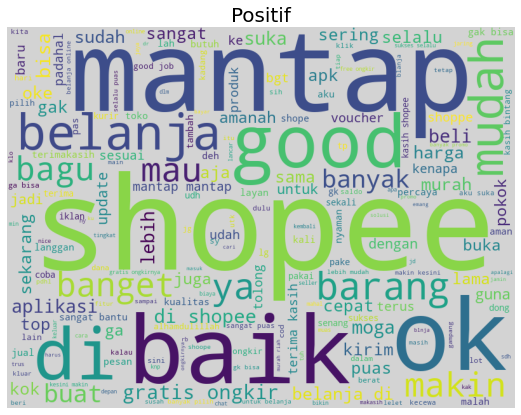

In [ ]:
show_wordcloud(data_positif, "Positif")

In [ ]:
positiveFD = nltk.FreqDist(word for text in df[df["label_inset"] == 1]["text_clean"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in df[df["label_inset"] == -1]["text_clean"] for word in text.lower().split())

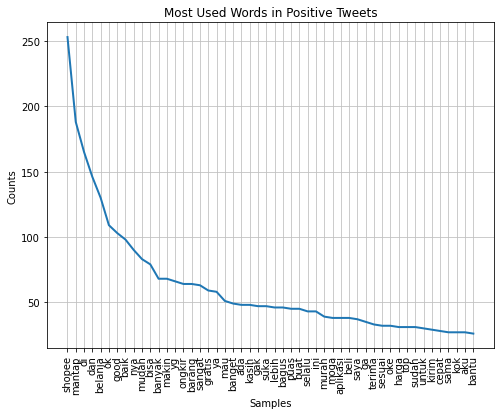

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Tweets")
positiveFD.plot(50)
plt.show()

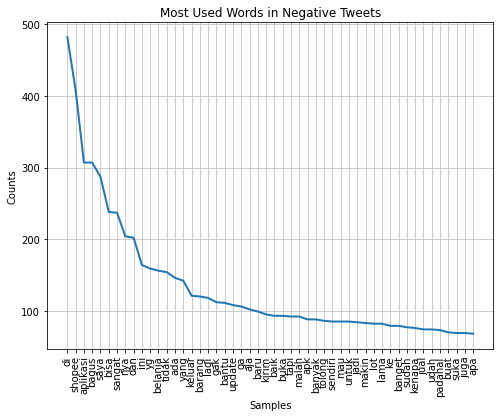

In [ ]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Tweets")
negativeFD.plot(50)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#vectorizer = CountVectorizer(min_df=1)
#X = vectorizer.fit_transform(df['text_clean'],).toarray()
y = df['label_inset']

In [ ]:
#len(X[1])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = CountVectorizer(min_df=2)
X = tfidf.fit_transform(df['text_clean']).toarray()


In [ ]:
len(X[1])

1403

In [ ]:
# Creating dataset
#np.random.seed(10)
#data = np.random.normal(100, 20, 200)
 
#fig = plt.figure(figsize =(10, 7))
 
# Creating plot
#plt.boxplot(fscore)
 
# show plot
#plt.show()

In [ ]:
#counts = pd.DataFrame(X1,
#                      columns=tfidf.get_feature_names())
#counts

In [ ]:
#counts = pd.DataFrame(X,
#                      columns=tfidf.get_feature_names())
#counts.to_csv('vektor1.csv', index = False)

Split data training dan data test dari seluruh data yang dimiliki

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=41)

In [ ]:
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly']}

#optimal_params = GridSearchCV(SVC(),param_grid,cv = 10,scoring = 'f1')
#optimal_params.fit(x_train, y_train)
#print(optimal_params.best_params_)

In [ ]:
#cv_result=pd.DataFrame(optimal_params.cv_results_)

In [ ]:
#cv_result.to_excel('cv_resultpjj2.xlsx')

Proses Klasifikasi Menggunakan SVM

In [ ]:
from sklearn import svm
# classify using support vector classifier
svm = svm.SVC(kernel = 'linear', gamma=1, C=1,probability= True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train, y_train).predict_proba(x_test)

# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


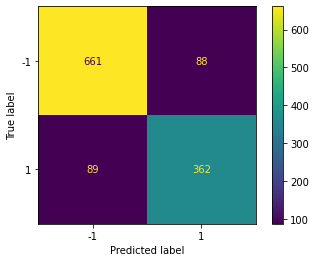

In [ ]:
plot_confusion_matrix(svm,
                      x_test,
                      y_test,
                      values_format='d')

In [ ]:
#membagi jumlah prediksi yang benar dengan total jumlah prediksi untuk mendapatkan presentase sample yang dikoreksi dengan benar
#tidak cocok digunakan saat data tidak seimbang
from sklearn.metrics import accuracy_score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  85.25 %


In [ ]:
#proporsi True Positif dengan prediksi jumlah anggota kelas positif (TP/(TP+FP))
from sklearn.metrics import precision_score
print("Precision score for SVC is: ", precision_score(y_test, y_pred_svm) * 100, '%')

Precision score for SVC is:  80.44444444444444 %


In [ ]:
#proporsi True Positif dengan jumlah anggota kelas positif(TP/(TP+FN))
from sklearn.metrics import recall_score
print("Recall score for SVC is: ", recall_score(y_test, y_pred_svm) * 100, '%')

Recall score for SVC is:  80.26607538802661 %


In [ ]:
from sklearn.metrics import f1_score
print("F1 score for SVC is: ", f1_score(y_test, y_pred_svm) * 100, '%')

F1 score for SVC is:  80.35516093229745 %


In [ ]:
#85.67,81.08,80.36,80.72 70/30
#85.25,80.44,80.27,80.35 60/40

In [ ]:
#81.44, 73.17, 49.38, 58.97 70/30
#80.7,68.01,48.55,56.66 60/40

In [ ]:
#80.7,68.01,48.55,56.66 60/40

In [ ]:
#menghitung rata-rata dari recall dan precision
#from sklearn.metrics import balanced_accuracy_score
#print("Balanced Accuracy score for SVC is: ",  balanced_accuracy_score(y_test, y_pred_svm) * 100, '%')

In [ ]:
#import timeit

#start = timeit.default_timer()

#Your statements here

#stop = timeit.default_timer()

#print('Time: ', stop - start) 

In [ ]:
#start = timeit.default_timer()
#i=1
#aku = []
#pres = []
#rec = []
#fscore = []
#while i <= 100:
#  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#  from sklearn import svm
#  # classify using support vector classifier
#  svm = svm.SVC(kernel = 'linear', gamma=0.01, C=1,probability= True)
#  # fit the SVC model based on the given training data
#  prob = svm.fit(x_train, y_train).predict_proba(x_test)
  # perform classification and prediction on samples in x_test
#  y_pred_svm = svm.predict(x_test)
#  aku.append(accuracy_score(y_test, y_pred_svm) * 100)
#  pres.append(precision_score(y_test, y_pred_svm) * 100)
#  rec.append(recall_score(y_test, y_pred_svm) * 100)
#  fscore.append(f1_score(y_test, y_pred_svm) * 100)
#  i+=1
#stop = timeit.default_timer()
#print('Time: ', stop - start) 

In [ ]:
#mean_aku = sum(aku)/len(aku)
#mean_pres = sum(pres)/len(pres)
#mean_rec = sum(rec)/len(rec)
#mean_fscore = sum(fscore)/len(fscore)
#print("Nilai akurasi untuk SVM: ", mean_aku, '%')
#print("Nilai presisi untuk SVM: ", mean_pres, '%')
#print("Nilai recall untuk SVM: ", mean_rec, '%')
#print("Nilai f1-score untuk SVM: ", mean_fscore, '%')

In [ ]:
# Creating dataset
#np.random.seed(10)
#data = np.random.normal(100, 20, 200)
 
#fig = plt.figure(figsize =(10, 7))
 
# Creating plot
#plt.boxplot(fscore)
#plt.boxplot(aku)
 
# show plot
#plt.show()